<a href="https://colab.research.google.com/github/harikavemula91/harikavemula91/blob/main/P3_ML_Counterfeit_Medicines_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import math
from sklearn.model_selection import train_test_split,KFold 
import numpy as np

#cross validation has been renamed and deprecated due to which we are gettng module name error.
#cross validation sub-module to model_selection.Try substituting cross_validation to model_selection

In [ ]:
#datafile_train=r'C:/Users/harish/Downloads/Data/Data/Consumer_Complaints_train.csv'
#datafile_test=r'C:/Users/harish/Downloads/Data/Data/Consumer_Complaints_test_share.csv'
datafile_train=r'counterfeit_train.csv'
datafile_test=r'counterfeit_test.csv'
cf_train=pd.read_csv(datafile_train)
cf_test=pd.read_csv(datafile_test)

In [ ]:
cf_train.dtypes


Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
dtype: object

In [ ]:
cf_test.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
dtype: object

In [ ]:
cf_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [ ]:
cf_train.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,5652.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,14.115057,1995.836316,151.401518,0.079174,2280.583480
std,4.649668,8.368979,62.203961,0.051481,1693.354404
min,5.855000,1983.000000,41.790000,0.013000,146.290000
25%,9.995000,1985.000000,104.509400,0.040058,933.265600
50%,13.800000,1997.000000,153.195700,0.066955,1902.670400
75%,18.050000,2002.000000,196.148350,0.107697,3207.638400
max,22.650000,2007.000000,277.188400,0.341391,13199.964800


In [ ]:
cf_train.corr()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
Counterfeit_Weight,1.000000,-0.016590,0.028523,-0.017632,0.005959
Active_Since,-0.016590,1.000000,0.002996,-0.075744,-0.039595
Medicine_MRP,0.028523,0.002996,1.000000,-0.003216,0.573684
Availability_rating,-0.017632,-0.075744,-0.003216,1.000000,-0.124058
Counterfeit_Sales,0.005959,-0.039595,0.573684,-0.124058,1.000000


In [ ]:
import seaborn as sns
%matplotlib inline

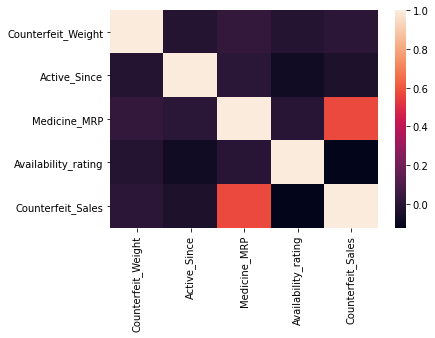

In [ ]:
sns.heatmap(cf_train.corr())

In [ ]:
cf_train.fillna(cf_train.mean(), inplace=True)
#filling  missing values

In [ ]:
cf_test.fillna(cf_test.mean(), inplace=True)

In [ ]:
cf_test.isnull().sum()

Medicine_ID            0
Counterfeit_Weight     0
DistArea_ID            0
Active_Since           0
Medicine_MRP           0
Medicine_Type          0
SidEffect_Level        0
Availability_rating    0
Area_Type              0
Area_City_Type         0
Area_dist_level        0
dtype: int64

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X=cf_train[['Medicine_MRP','Counterfeit_Weight']]
X_min_max = min_max_scaler.fit_transform(X)

X_test=cf_test[['Medicine_MRP','Counterfeit_Weight']]
X_min_max_test = min_max_scaler.fit_transform(X_test)

In [ ]:
X_min_max

array([[0.50317504, 0.43137839],
       [0.29162645, 0.49181641],
       [0.92447187, 0.18874665],
       ...,
       [0.64503072, 0.84221494],
       [0.51435439, 0.25751712],
       [0.5767244 , 0.12354868]])

In [ ]:
v=np.array(X_min_max)
v_test=np.array(X_min_max_test)

In [ ]:
cf_train['Medicine_MRP_n'], cf_train['Counterfeit_Weight_n'] = v.T
cf_test['Medicine_MRP_n'], cf_test['Counterfeit_Weight_n'] = v_test.T


In [ ]:
cf_train.dtypes

Medicine_ID              object
Counterfeit_Weight      float64
DistArea_ID              object
Active_Since              int64
Medicine_MRP            float64
Medicine_Type            object
SidEffect_Level          object
Availability_rating     float64
Area_Type                object
Area_City_Type           object
Area_dist_level          object
Counterfeit_Sales       float64
Medicine_MRP_n          float64
Counterfeit_Weight_n    float64
dtype: object

In [ ]:
cf_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,Medicine_MRP_n,Counterfeit_Weight_n
0,RRA15,13.100000,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,0.503175,0.431378
1,YVV26,14.115057,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,0.291626,0.491816
2,LJC15,9.025000,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,0.924472,0.188747
3,GWC40,11.800000,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,0.247211,0.353974
4,QMN13,14.115057,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,0.062236,0.491816


In [ ]:
for col in cf_train.select_dtypes(['object']).columns:
    print(col,':',cf_train[col].nunique())

Medicine_ID : 1557
DistArea_ID : 10
Medicine_Type : 16
SidEffect_Level : 2
Area_Type : 4
Area_City_Type : 3
Area_dist_level : 4


In [ ]:
cf_train['Active_Since'].unique()


array([1995, 1983, 2000, 2007, 1985, 2005, 1996, 2002, 1997])

In [ ]:
cf_test['Active_Since'].unique()

array([1983, 2000, 1996, 1995, 2005, 2007, 1985, 1997, 2002])

In [ ]:
cf_train.isnull().sum()

Medicine_ID             0
Counterfeit_Weight      0
DistArea_ID             0
Active_Since            0
Medicine_MRP            0
Medicine_Type           0
SidEffect_Level         0
Availability_rating     0
Area_Type               0
Area_City_Type          0
Area_dist_level         0
Counterfeit_Sales       0
Medicine_MRP_n          0
Counterfeit_Weight_n    0
dtype: int64

In [ ]:
#test_1
for col in ['Counterfeit_Weight','Medicine_MRP']:
    cf_train.drop([col],1,inplace=True)
    cf_test.drop([col],1,inplace=True)

In [ ]:
#test_2 - better MAE

for col in ['Counterfeit_Weight','Medicine_MRP','Availability_rating']:
    cf_train.drop([col],1,inplace=True)
    cf_test.drop([col],1,inplace=True)

In [ ]:
#test_6 

for col in ['Counterfeit_Weight','Medicine_MRP','Availability_rating','Area_dist_level']:
    cf_train.drop([col],1,inplace=True)
    cf_test.drop([col],1,inplace=True)

In [ ]:
#test_7


for col in ['Counterfeit_Weight','Medicine_MRP','Availability_rating','DistArea_ID']:
    cf_train.drop([col],1,inplace=True)
    cf_test.drop([col],1,inplace=True)

In [ ]:
#latest_test10
for col in ['Counterfeit_Weight','Medicine_MRP','Active_Since']:
    cf_train.drop([col],1,inplace=True)
    cf_test.drop([col],1,inplace=True)

In [ ]:
#latest_test11
for col in ['Availability_rating']:
    cf_train.drop([col],1,inplace=True)
    cf_test.drop([col],1,inplace=True)

In [ ]:
cf_train.isnull().sum()

Medicine_ID             0
DistArea_ID             0
Active_Since            0
Medicine_Type           0
SidEffect_Level         0
Area_Type               0
Area_City_Type          0
Area_dist_level         0
Counterfeit_Sales       0
Medicine_MRP_n          0
Counterfeit_Weight_n    0
dtype: int64

In [ ]:
for col in ["DistArea_ID","Medicine_Type","SidEffect_Level","Area_Type","Area_City_Type","Area_dist_level"]:
    
    temp=pd.get_dummies(cf_train[col],prefix=col,drop_first=True)
    cf_train=pd.concat([temp,cf_train],1)
    cf_train.drop([col],1,inplace=True)
    
    temp=pd.get_dummies(cf_test[col],prefix=col,drop_first=True)
    cf_test=pd.concat([temp,cf_test],1)
    cf_test.drop([col],1,inplace=True)


In [ ]:
#test_6 - no better performance
for col in ["DistArea_ID","Medicine_Type","SidEffect_Level","Area_Type","Area_City_Type"]:
    
    temp=pd.get_dummies(cf_train[col],prefix=col,drop_first=True)
    cf_train=pd.concat([temp,cf_train],1)
    cf_train.drop([col],1,inplace=True)
    
    temp=pd.get_dummies(cf_test[col],prefix=col,drop_first=True)
    cf_test=pd.concat([temp,cf_test],1)
    cf_test.drop([col],1,inplace=True)

In [ ]:
#test_7
for col in ["Medicine_Type","SidEffect_Level","Area_Type","Area_City_Type","Area_dist_level"]:
    
    temp=pd.get_dummies(cf_train[col],prefix=col,drop_first=True)
    cf_train=pd.concat([temp,cf_train],1)
    cf_train.drop([col],1,inplace=True)
    
    temp=pd.get_dummies(cf_test[col],prefix=col,drop_first=True)
    cf_test=pd.concat([temp,cf_test],1)
    cf_test.drop([col],1,inplace=True)

In [ ]:
cf_train.head()

,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,SidEffect_Level_mild,Medicine_Type_Antacids,Medicine_Type_Antibiotics,Medicine_Type_Antifungal,Medicine_Type_Antimalarial,Medicine_Type_Antipyretics,Medicine_Type_Antiseptics,Medicine_Type_Antiviral,Medicine_Type_Cardiac,Medicine_Type_Hreplacements,Medicine_Type_Mstablizers,Medicine_Type_MuscleRelaxants,Medicine_Type_OralContraceptives,Medicine_Type_Statins,Medicine_Type_Stimulants,Medicine_Type_Tranquilizers,DistArea_ID_Area013,DistArea_ID_Area017,DistArea_ID_Area018,DistArea_ID_Area019,DistArea_ID_Area027,DistArea_ID_Area035,DistArea_ID_Area045,DistArea_ID_Area046,DistArea_ID_Area049,Medicine_ID,Active_Since,Counterfeit_Sales,Medicine_MRP_n,Counterfeit_Weight_n
0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,RRA15,1995,1775.5026,0.503175,0.431378
1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,YVV26,1983,3069.1520,0.291626,0.491816
2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,LJC15,1995,2603.0920,0.924472,0.188747
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,GWC40,1995,1101.7130,0.247211,0.353974
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,QMN13,1983,158.9402,0.062236,0.491816


In [ ]:
cf_train.dtypes

Area_dist_level_Medium                uint8
Area_dist_level_Small                 uint8
Area_dist_level_Unknown               uint8
Area_City_Type_Tier 2                 uint8
Area_City_Type_Tier 3                 uint8
Area_Type_DownTown                    uint8
Area_Type_Industrial                  uint8
Area_Type_MidTownResidential          uint8
SidEffect_Level_mild                  uint8
Medicine_Type_Antacids                uint8
Medicine_Type_Antibiotics             uint8
Medicine_Type_Antifungal              uint8
Medicine_Type_Antimalarial            uint8
Medicine_Type_Antipyretics            uint8
Medicine_Type_Antiseptics             uint8
Medicine_Type_Antiviral               uint8
Medicine_Type_Cardiac                 uint8
Medicine_Type_Hreplacements           uint8
Medicine_Type_Mstablizers             uint8
Medicine_Type_MuscleRelaxants         uint8
Medicine_Type_OralContraceptives      uint8
Medicine_Type_Statins                 uint8
Medicine_Type_Stimulants        

In [ ]:
#Test_5 - Failed
for col in ['Area_dist_level_Unknown']:
    cf_train.drop([col],1,inplace=True)
    cf_test.drop([col],1,inplace=True)


In [ ]:
#test_4 - Failed, got more less MAE

for col in ['DistArea_ID_Area018']:
    cf_train.drop([col],1,inplace=True)
    cf_test.drop([col],1,inplace=True)

In [ ]:
#test - failed - removed Availability rating and created dummy for Active since manually
for col in ["Active_Since","Availability_rating"]:
    
    temp=pd.get_dummies(cf_train[col],prefix=col,drop_first=True)
    cf_train=pd.concat([temp,cf_train],1)
    cf_train.drop([col],1,inplace=True)
    
    temp=pd.get_dummies(cf_test[col],prefix=col,drop_first=True)
    cf_test=pd.concat([temp,cf_test],1)
    cf_test.drop([col],1,inplace=True)

In [ ]:
#latest test to get better score after submitting
for col in ["Availability_rating"]:
    
    temp=pd.get_dummies(cf_train[col],prefix=col,drop_first=True)
    cf_train=pd.concat([temp,cf_train],1)
    cf_train.drop([col],1,inplace=True)
    
    temp=pd.get_dummies(cf_test[col],prefix=col,drop_first=True)
    cf_test=pd.concat([temp,cf_test],1)
    cf_test.drop([col],1,inplace=True)

In [ ]:
#test_3
cf_train['Active_Since'].unique()

array([1995, 1983, 2000, 2007, 1985, 2005, 1996, 2002, 1997])

In [ ]:
#test_3

for col in ["Active_Since"]:

    temp=np.subtract(2020,cf_train[col])

for col in ["Active_Since"]:

    temp_test=np.subtract(2020,cf_test[col])

In [ ]:
#test_3
print(temp)


0       25
1       37
2       25
3       25
4       37
        ..
6813    25
6814    25
6815    15
6816    20
6817    13
Name: Active_Since, Length: 6818, dtype: int64


In [ ]:
#test_3
temp.unique()

array([25, 37, 20, 13, 35, 15, 24, 18, 23])

In [ ]:
#test_3- failed
for col in ["Active_Since"]:
    cf_train=pd.concat([temp,cf_train],1)
    cf_train.drop([col],1,inplace=True)

In [ ]:
#test_3

cf_train['Activesince_years'] = temp 
cf_test['Activesince_years'] = temp_test 

In [ ]:
#test_3
for col in ['Activesince_years']:
    
    temp_1=pd.get_dummies(cf_train[col],prefix=col,drop_first=True)
    cf_train=pd.concat([temp_1,cf_train],1)
    cf_train.drop([col],1,inplace=True)
    
    temp_1=pd.get_dummies(cf_test[col],prefix=col,drop_first=True)
    cf_test=pd.concat([temp_1,cf_test],1)
    cf_test.drop([col],1,inplace=True)

In [ ]:
for col in ['Active_Since']:
    cf_train.drop([col],1,inplace=True)
    cf_test.drop([col],1,inplace=True)

In [ ]:
cf_train.head()

,Activesince_years_15,Activesince_years_18,Activesince_years_20,Activesince_years_23,Activesince_years_24,Activesince_years_25,Activesince_years_35,Activesince_years_37,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,SidEffect_Level_mild,Medicine_Type_Antacids,Medicine_Type_Antibiotics,Medicine_Type_Antifungal,Medicine_Type_Antimalarial,Medicine_Type_Antipyretics,Medicine_Type_Antiseptics,Medicine_Type_Antiviral,Medicine_Type_Cardiac,Medicine_Type_Hreplacements,Medicine_Type_Mstablizers,Medicine_Type_MuscleRelaxants,Medicine_Type_OralContraceptives,Medicine_Type_Statins,Medicine_Type_Stimulants,Medicine_Type_Tranquilizers,DistArea_ID_Area013,DistArea_ID_Area017,DistArea_ID_Area018,DistArea_ID_Area019,DistArea_ID_Area027,DistArea_ID_Area035,DistArea_ID_Area045,DistArea_ID_Area046,DistArea_ID_Area049,Medicine_ID,Counterfeit_Sales,Medicine_MRP_n,Counterfeit_Weight_n
0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,RRA15,1775.5026,0.503175,0.431378
1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,YVV26,3069.1520,0.291626,0.491816
2,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,LJC15,2603.0920,0.924472,0.188747
3,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,GWC40,1101.7130,0.247211,0.353974
4,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,QMN13,158.9402,0.062236,0.491816


In [ ]:
#test_2 - not important
for col in ["Active_Since"]:
    
    temp=pd.get_dummies(cf_train[col],prefix=col,drop_first=True)
    cf_train=pd.concat([temp,cf_train],1)
    cf_train.drop([col],1,inplace=True)
    
    temp=pd.get_dummies(cf_test[col],prefix=col,drop_first=True)
    cf_test=pd.concat([temp,cf_test],1)
    cf_test.drop([col],1,inplace=True)

In [ ]:
cf_train.dtypes

Activesince_years_15                  uint8
Activesince_years_18                  uint8
Activesince_years_20                  uint8
Activesince_years_23                  uint8
Activesince_years_24                  uint8
Activesince_years_25                  uint8
Activesince_years_35                  uint8
Activesince_years_37                  uint8
Area_dist_level_Medium                uint8
Area_dist_level_Small                 uint8
Area_dist_level_Unknown               uint8
Area_City_Type_Tier 2                 uint8
Area_City_Type_Tier 3                 uint8
Area_Type_DownTown                    uint8
Area_Type_Industrial                  uint8
Area_Type_MidTownResidential          uint8
SidEffect_Level_mild                  uint8
Medicine_Type_Antacids                uint8
Medicine_Type_Antibiotics             uint8
Medicine_Type_Antifungal              uint8
Medicine_Type_Antimalarial            uint8
Medicine_Type_Antipyretics            uint8
Medicine_Type_Antiseptics       

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
cf_train1,cf_train2=train_test_split(cf_train,test_size=0.2,random_state=2)

In [ ]:
#test-fail
x=cf_train1.drop(['Counterfeit_Sales','Medicine_ID','Medicine_MRP'],1)
y=cf_train1['Counterfeit_Sales']

KeyError: ignored

In [ ]:
#test
x=cf_train1.drop(['Counterfeit_Sales','Medicine_ID'],1)
y=cf_train1['Counterfeit_Sales']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x.isnull().sum()

Activesince_years_15                0
Activesince_years_18                0
Activesince_years_20                0
Activesince_years_23                0
Activesince_years_24                0
Activesince_years_25                0
Activesince_years_35                0
Activesince_years_37                0
Area_dist_level_Medium              0
Area_dist_level_Small               0
Area_dist_level_Unknown             0
Area_City_Type_Tier 2               0
Area_City_Type_Tier 3               0
Area_Type_DownTown                  0
Area_Type_Industrial                0
Area_Type_MidTownResidential        0
SidEffect_Level_mild                0
Medicine_Type_Antacids              0
Medicine_Type_Antibiotics           0
Medicine_Type_Antifungal            0
Medicine_Type_Antimalarial          0
Medicine_Type_Antipyretics          0
Medicine_Type_Antiseptics           0
Medicine_Type_Antiviral             0
Medicine_Type_Cardiac               0
Medicine_Type_Hreplacements         0
Medicine_Typ

In [ ]:
x.head()

,Activesince_years_15,Activesince_years_18,Activesince_years_20,Activesince_years_23,Activesince_years_24,Activesince_years_25,Activesince_years_35,Activesince_years_37,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,SidEffect_Level_mild,Medicine_Type_Antacids,Medicine_Type_Antibiotics,Medicine_Type_Antifungal,Medicine_Type_Antimalarial,Medicine_Type_Antipyretics,Medicine_Type_Antiseptics,Medicine_Type_Antiviral,Medicine_Type_Cardiac,Medicine_Type_Hreplacements,Medicine_Type_Mstablizers,Medicine_Type_MuscleRelaxants,Medicine_Type_OralContraceptives,Medicine_Type_Statins,Medicine_Type_Stimulants,Medicine_Type_Tranquilizers,DistArea_ID_Area013,DistArea_ID_Area017,DistArea_ID_Area018,DistArea_ID_Area019,DistArea_ID_Area027,DistArea_ID_Area035,DistArea_ID_Area045,DistArea_ID_Area046,DistArea_ID_Area049,Medicine_MRP_n,Counterfeit_Weight_n
1063,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.534433,0.464126
3090,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.856725,0.407264
4768,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.671481,0.491816
2240,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.088541,0.491816
5114,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.759989,0.681453


In [ ]:
x.shape

(5454, 43)

In [ ]:
lm.intercept_
#test_2- -6981109987414122.0
#test_3- -1.0105800675279288e+16
#test_4- -2.1432928229302028e+16
#test_5- -6720295380200376.0
#test_6- 6674560271483168.0
#test_7- -3.2917475990601384e+16
#scaled down: -3258060151327394.5
#test_new: 1110468345780996.4
#without active_since: -7990263069545584.0

-3258060151327394.5

In [ ]:
list(zip(x.columns,lm.coef_))
#most less for DistArea_ID_Area018

[('Activesince_years_15', -1253880865415362.0),
 ('Activesince_years_18', 1.444921587370024e+16),
 ('Activesince_years_20', 267594794618970.38),
 ('Activesince_years_23', -3.466273616337851e+16),
 ('Activesince_years_24', 1.0557248347256622e+16),
 ('Activesince_years_25', -4703588128077896.0),
 ('Activesince_years_35', 1.9171624390056464e+16),
 ('Activesince_years_37', -7081796547527082.0),
 ('Area_dist_level_Medium', 1.5245605675839504e+16),
 ('Area_dist_level_Small', 2126576682669700.5),
 ('Area_dist_level_Unknown', 2215172905895033.2),
 ('Area_City_Type_Tier 2', -6897328197021313.0),
 ('Area_City_Type_Tier 3', -1635074830730663.5),
 ('Area_Type_DownTown', 1.5584497130807322e+16),
 ('Area_Type_Industrial', -4709425414655956.0),
 ('Area_Type_MidTownResidential', -7879286271094858.0),
 ('SidEffect_Level_mild', 8.035398250062117),
 ('Medicine_Type_Antacids', 10.162730680193075),
 ('Medicine_Type_Antibiotics', 77.27985476665994),
 ('Medicine_Type_Antifungal', 7.399049082969348),
 ('Medic

In [ ]:
x_train2=cf_train2.drop(['Counterfeit_Sales','Medicine_ID'],axis=1)

In [ ]:
predicted_ir=lm.predict(x_train2)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(cf_train2['Counterfeit_Sales'],predicted_ir)
#test_2=MAE=1145.1579491202347
#test_3=MAE=1142.4601585043988
#test_4=1144.8599400293256
#test_5=1146.0687306451614
#test_6=1142.7133640762463
#test_7=1143.777745601173
#scaled down: 830.9371711143694
#latest_test: 3513585173425.44
#without_Active_since: 831.476916568915

830.9371711143694

In [ ]:
MAE = mean_absolute_error(cf_train2['Counterfeit_Sales'],predicted_ir)

In [ ]:
Score = 1-(MAE/1660)
print(Score)
#Test1: full(7645678 ..ex)(without Medicine_MRP,Counterfeit_Weight)
#test2: 0.3101458137829912 (without Counterfeit_Weight,Medicine_MRP,Availability rating)
#test3: 0.31177098885277177(without Counterfeit_Weight,Medicine_MRP,Availability rating and converted Active since to temp)
#test4: 0.3103253373317316(removed DistArea_ID_Area018 additionally)
#test5: 0.3095971502137582(removed Area_dist_level_Unknown)
#test6: 0.3116184553757553(removed Area_dist_level)
#test7: 0.31097726168604045(removed DistArea_ID)
#scaled down: 0.49943543908772925(scaled down Counterfeit_Weight,Medicine_MRP and removed Availability rating)
#latest_test: -2116617573.3526747(added 'Availability rating')
#without_ACtive_since: 0.4991102912235451(scaled down Counterfeit_Weight,Medicine_MRP and removed Availability rating and Active_since)

0.49943543908772925


In [ ]:
#feature coeffecients

In [ ]:
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["x%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
 


In [ ]:
print "Linear model:", pretty_print_linear(lm.coef_)

SyntaxError: ignored

In [ ]:
x_test=cf_test.drop(['Medicine_ID'],axis=1)

In [ ]:
test_pred=lm.predict(x_test)

In [ ]:
print(test_pred)

[2886.5 3887.  1403.  ... 2859.  3809.  3685.5]


In [ ]:
pd.DataFrame(test_pred).to_csv("mysubmission.csv",index=False)

In [ ]:
#Ridge

In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
lambdas=np.linspace(1,100,100)

In [ ]:
params={'alpha':lambdas}

In [ ]:
model=Ridge(fit_intercept=True)

In [ ]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
#test_2
#grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35....,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             pre_dispatch='2*n

In [ ]:
grid_search.best_estimator_

Ridge(alpha=13.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.00831125, 0.00707622, 0.00720334, 0.00700102, 0.00709274,
        0.0072715 , 0.00691988, 0.00790622, 0.00714486, 0.00711391,
        0.00706713, 0.00711215, 0.00705745, 0.00700996, 0.00688081,
        0.00694289, 0.00692391, 0.00690062, 0.00755885, 0.00679016,
        0.00703251, 0.00737948, 0.00683506, 0.00676558, 0.00691633,
        0.00700748, 0.00689845, 0.00704489, 0.00696094, 0.00721037,
        0.00691547, 0.00714855, 0.00736833, 0.00702932, 0.00700283,
        0.0067956 , 0.0067982 , 0.00692854, 0.00696843, 0.00681946,
        0.00695419, 0.00680876, 0.00712748, 0.00684235, 0.00688171,
        0.00676327, 0.00691111, 0.006971  , 0.00678589, 0.0068357 ,
        0.00681148, 0.00796916, 0.00685651, 0.00705204, 0.00692286,
        0.00690057, 0.0070044 , 0.00687768, 0.00686097, 0.00704675,
        0.00692377, 0.00677769, 0.00777962, 0.00704377, 0.00702386,
        0.00695848, 0.00676584, 0.0071548 , 0.00694652, 0.0070384 ,
        0.00693181, 0.00700917,

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(grid_search.cv_results_,100)

Model with rank: 1
Mean validation score: -828.943 (std: 27.951)
Parameters: {'alpha': 13.0}

Model with rank: 2
Mean validation score: -828.944 (std: 27.930)
Parameters: {'alpha': 14.0}

Model with rank: 3
Mean validation score: -828.950 (std: 27.911)
Parameters: {'alpha': 15.0}

Model with rank: 4
Mean validation score: -828.956 (std: 27.970)
Parameters: {'alpha': 12.0}

Model with rank: 5
Mean validation score: -828.959 (std: 27.891)
Parameters: {'alpha': 16.0}

Model with rank: 6
Mean validation score: -828.973 (std: 27.869)
Parameters: {'alpha': 17.0}

Model with rank: 7
Mean validation score: -828.982 (std: 27.988)
Parameters: {'alpha': 11.0}

Model with rank: 8
Mean validation score: -828.992 (std: 27.847)
Parameters: {'alpha': 18.0}

Model with rank: 9
Mean validation score: -829.010 (std: 28.006)
Parameters: {'alpha': 10.0}

Model with rank: 10
Mean validation score: -829.015 (std: 27.826)
Parameters: {'alpha': 19.0}

Model with rank: 11
Mean validation score: -829.040 (std: 2

In [ ]:
test_pred=grid_search.predict(x_train2)

In [ ]:
mean_absolute_error(cf_train2['Counterfeit_Sales'],test_pred)

830.4062121436776

In [ ]:
MAE_Ridge = mean_absolute_error(cf_train2['Counterfeit_Sales'],test_pred)

In [ ]:
Score = 1-(MAE_Ridge/1660)
print(Score)


0.4997552938893508


In [ ]:
#Lasso

In [ ]:
lambdas=np.linspace(1,20,100)
model=Lasso(fit_intercept=True)
params={'alpha':lambdas}

In [ ]:
grid_search=GridSearchCV(model,param_grid=params,cv=20,scoring='neg_mean_absolute_error')

In [ ]:
grid_search.fit(x,y)

GridSearchCV(cv=20, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 1.        ,  1.19191919,  1.38383838,  1.57575758,  1.76767677,
        1.95959596,  2.15151515,  2.343...
       15.39393939, 15.58585859, 15.77777778, 15.96969697, 16.16161616,
       16.35353535, 16.54545455, 16.73737374, 16.92929293, 17.12121212,
       17.31313131, 17.50505051, 17.6969697 , 17.88888889, 18.08080808,
       18.27272727, 18.46464646, 18.65656566, 18.84848485, 19.04040404,
       19.23232323, 19.42424242, 19.61616162, 19.80808081, 20.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_abso

In [ ]:
grid_search.best_estimator_

Lasso(alpha=7.717171717171717, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -824.901 (std: 35.553)
Parameters: {'alpha': 7.717171717171717}

Model with rank: 2
Mean validation score: -824.901 (std: 35.553)
Parameters: {'alpha': 7.525252525252525}

Model with rank: 3
Mean validation score: -824.906 (std: 35.556)
Parameters: {'alpha': 7.333333333333333}

Model with rank: 4
Mean validation score: -824.908 (std: 35.560)
Parameters: {'alpha': 7.141414141414141}

Model with rank: 5
Mean validation score: -824.908 (std: 35.556)
Parameters: {'alpha': 7.909090909090908}



In [ ]:
lasso_model=grid_search.best_estimator_

In [ ]:
lasso_model.fit(x,y)

Lasso(alpha=7.717171717171717, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
list(zip(x_train.columns,lasso_model.coef_))

NameError: ignored

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.03732566, 0.03142312, 0.02778713, 0.02518338, 0.02382748,
        0.02155232, 0.02033151, 0.01874433, 0.0199048 , 0.01722277,
        0.01682832, 0.01552271, 0.01521797, 0.01493484, 0.014258  ,
        0.01402467, 0.01417787, 0.013267  , 0.01328824, 0.01270108,
        0.01255233, 0.01200684, 0.01161237, 0.01195693, 0.01125115,
        0.01103394, 0.0108449 , 0.01061834, 0.0103199 , 0.01018945,
        0.00996045, 0.01044412, 0.00984049, 0.00976404, 0.00956869,
        0.00953801, 0.00984944, 0.00946165, 0.00912986, 0.00912681,
        0.0094846 , 0.00889317, 0.00889436, 0.00869111, 0.00860691,
        0.00900719, 0.00977819, 0.00855694, 0.00838104, 0.00856007,
        0.00823828, 0.00822482, 0.00857873, 0.00809685, 0.00863531,
        0.00815756, 0.00803001, 0.00803264, 0.00803413, 0.00800478,
        0.00806978, 0.00833622, 0.00780563, 0.00788219, 0.00782387,
        0.0077752 , 0.00766279, 0.00775048, 0.0076166 , 0.00768955,
        0.00768652, 0.00759387,

In [ ]:
test_pred_L=grid_search.predict(x_train2)

In [ ]:
MAE_Lasso = mean_absolute_error(cf_train2['Counterfeit_Sales'],test_pred_L)

In [ ]:
Score = 1-(MAE_Lasso/1660)
print(Score)

0.5026773921691574


In [ ]:
test_pred_L1=grid_search.predict(x_test)

In [ ]:
print(test_pred_L1)
pd.DataFrame(test_pred_L1).to_csv("mysubmission.csv",index=False)

[2767.20884573 3943.90340816 1569.33629391 ... 2867.44730237 3867.59547825
 3678.72546121]


In [ ]:
test_pred_L1

array([2761.48992607, 3945.87334144, 1575.68209   , ..., 2866.0708827 ,
       3869.27836367, 3677.45995454])

In [ ]:
test_pred

array([1085.68071808,  898.97074415, 3820.67204142, ..., 1700.56208416,
       3854.70259697, 1735.58178285])

In [ ]:
#data analysis

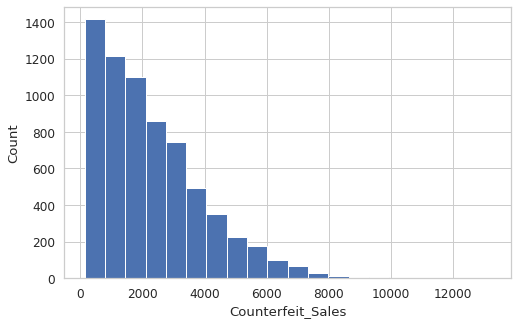

In [ ]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    cf_train['Counterfeit_Sales'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Counterfeit_Sales', ylabel='Count');

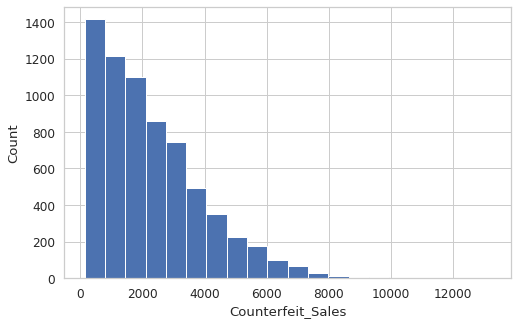

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    cf_train['Counterfeit_Sales'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Counterfeit_Sales', ylabel='Count');

In [ ]:
cf_train.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
dtype: object

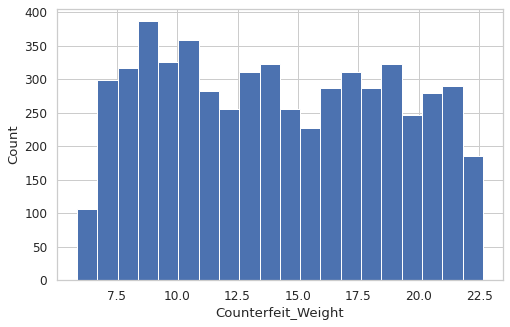

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    cf_train['Counterfeit_Weight'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Counterfeit_Weight', ylabel='Count');

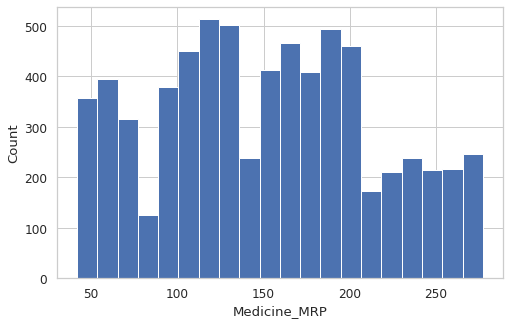

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    cf_train['Medicine_MRP'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Medicine_MRP', ylabel='Count');

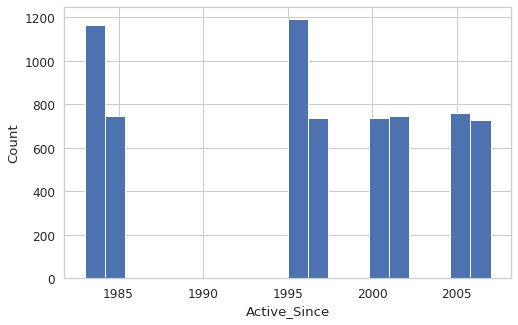

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    cf_train['Active_Since'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Active_Since', ylabel='Count');

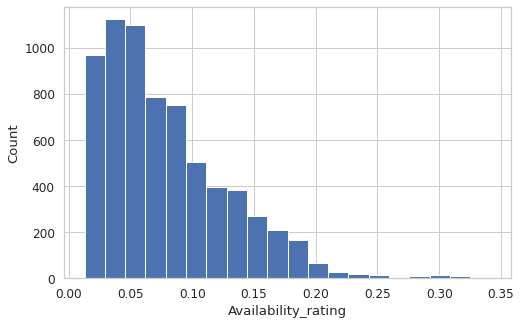

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    cf_train['Availability_rating'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Availability_rating', ylabel='Count');

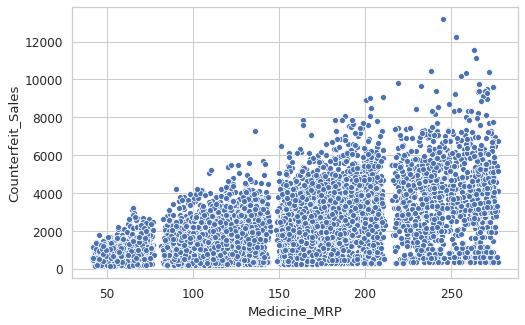

In [ ]:
sns.scatterplot(x=cf_train['Medicine_MRP'], y=cf_train['Counterfeit_Sales']);

In [ ]:
sns.boxplot(x=cf_train['Medicine_MRP_n'], y=cf_train['Counterfeit_Sales']);

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa90ee89620> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fa90dd7bae8> (for post_execute):


KeyboardInterrupt: ignored

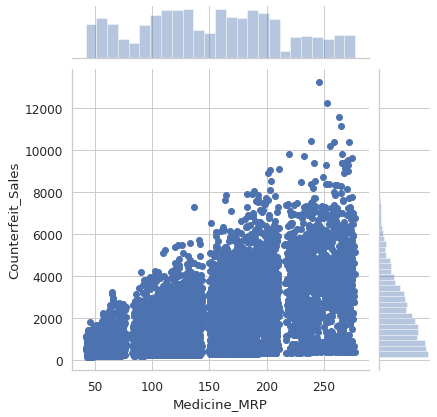

In [ ]:
sns.jointplot(x=cf_train['Medicine_MRP'], y=cf_train['Counterfeit_Sales']);

In [ ]:
Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
dtype: object

ValueError: ignored

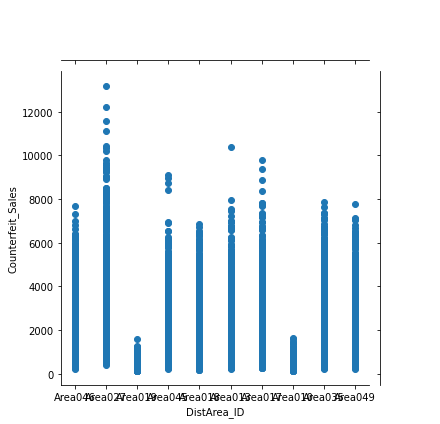

In [ ]:
sns.jointplot(x=cf_train['DistArea_ID'], y=cf_train['Counterfeit_Sales']);

ValueError: ignored

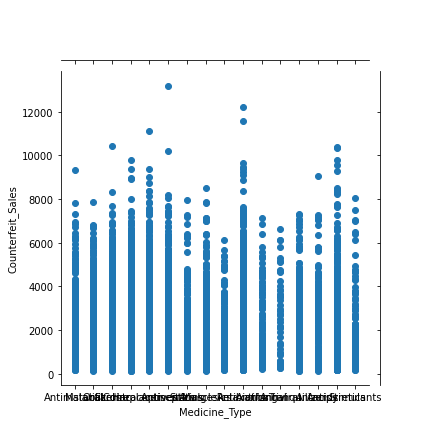

In [ ]:
sns.jointplot(x=cf_train['Medicine_Type'], y=cf_train['Counterfeit_Sales']);

ValueError: ignored

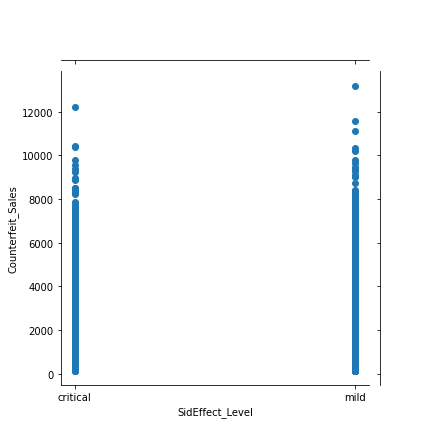

In [ ]:
sns.jointplot(x=cf_train['SidEffect_Level'], y=cf_train['Counterfeit_Sales']);

ValueError: ignored

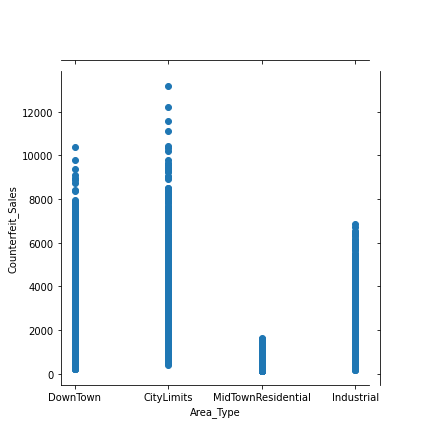

In [ ]:
sns.jointplot(x=cf_train['Area_Type'], y=cf_train['Counterfeit_Sales']);

ValueError: ignored

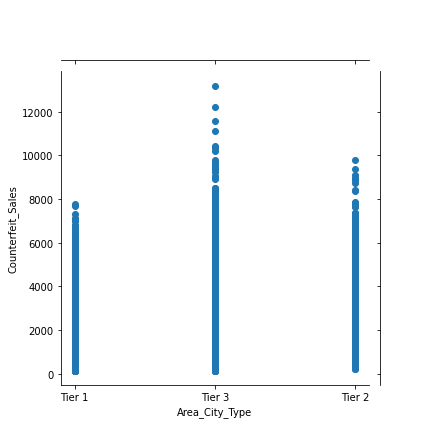

In [ ]:
sns.jointplot(x=cf_train['Area_City_Type'], y=cf_train['Counterfeit_Sales']);

ValueError: ignored

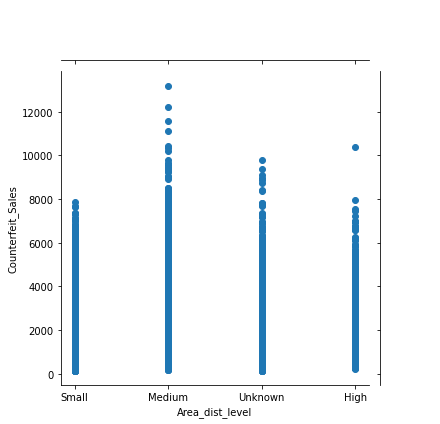

In [ ]:
sns.jointplot(x=cf_train['Area_dist_level'], y=cf_train['Counterfeit_Sales']);